In [ ]:
import pandas as pd

# File paths
file_paths = {
    'MIR': 'IST_MIR.csv',
    'MOZ': 'IST_MOZ.csv',
    'OST': 'IST_OST.csv',
    'WIK': 'IST_WIK.csv'
}

# Loading the data
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Displaying the first few rows of each dataframe to understand the structure
for name, df in dataframes.items():
    print(f"{name} dataset:")
    print(df.head(), "\n")


MIR dataset:
        org                                              file_  URL  File  \
0  MIRANTIS  /Users/akond/PUPP_REPOS/mirantis-downloads/pup...    0     0   
1  MIRANTIS  /Users/akond/PUPP_REPOS/mirantis-downloads/pup...    1     1   
2  MIRANTIS  /Users/akond/PUPP_REPOS/mirantis-downloads/fue...    0     2   
3  MIRANTIS  /Users/akond/PUPP_REPOS/mirantis-downloads/fue...    0     0   
4  MIRANTIS  /Users/akond/PUPP_REPOS/mirantis-downloads/pup...    0     2   

   Lines_of_code  Require  Ensure  Include  Attribute  Hard_coded_string  \
0            125        0       0        0         27                 16   
1             35        0       1        1          6                 10   
2             53        0       3        5         19                 15   
3              1        0       0        1          0                  0   
4            278        6       4       11         54                 30   

   Comment  Command  File_mode  SSH_KEY  defect_status  
0       32

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each source code property between defective and non-defective scripts

def mann_whitney_test(df, property_name):
    # Separate defective and non-defective groups
    defective = df[df['defect_status'] == 1][property_name]
    non_defective = df[df['defect_status'] == 0][property_name]

    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(defective, non_defective)
    return stat, p_value

# List of relevant properties
properties = [
    'Lines_of_code', 'Include', 'Hard_coded_string', 'Require', 'Ensure',
    'Attribute', 'Comment', 'Command', 'File_mode', 'SSH_KEY', 'URL'
]

# Store results
mann_whitney_results = {dataset: {} for dataset in dataframes}

# Run the test for each dataset and each property
for dataset_name, df in dataframes.items():
    for prop in properties:
        stat, p_value = mann_whitney_test(df, prop)
        mann_whitney_results[dataset_name][prop] = (stat, p_value)

# Display the results
mann_whitney_results


{'MIR': {'Lines_of_code': (6047.0, 7.613315787832636e-09),
  'Include': (5345.0, 0.00014394689193644053),
  'Hard_coded_string': (6254.0, 1.7321501953287228e-10),
  'Require': (5466.0, 1.0883345336130642e-05),
  'Ensure': (5573.5, 4.362637972477891e-06),
  'Attribute': (5928.0, 4.9528503142240916e-08),
  'Comment': (5518.0, 1.9042069233839688e-05),
  'Command': (5011.5, 5.6929241615416886e-05),
  'File_mode': (5679.5, 9.927870138382922e-08),
  'SSH_KEY': (5613.5, 3.8024304555408804e-07),
  'URL': (4938.0, 0.00040209142219224117)},
 'MOZ': {'Lines_of_code': (62758.5, 4.425628134814542e-26),
  'Include': (54594.5, 5.897600167639975e-11),
  'Hard_coded_string': (58419.0, 2.416635936451001e-17),
  'Require': (49701.0, 1.2130124324299097e-06),
  'Ensure': (45309.5, 0.04587636823498372),
  'Attribute': (58511.5, 2.462323755578972e-17),
  'Comment': (42694.5, 0.4650613596176112),
  'Command': (49121.5, 2.869811746710784e-07),
  'File_mode': (51586.5, 8.353326494365984e-10),
  'SSH_KEY': (5158

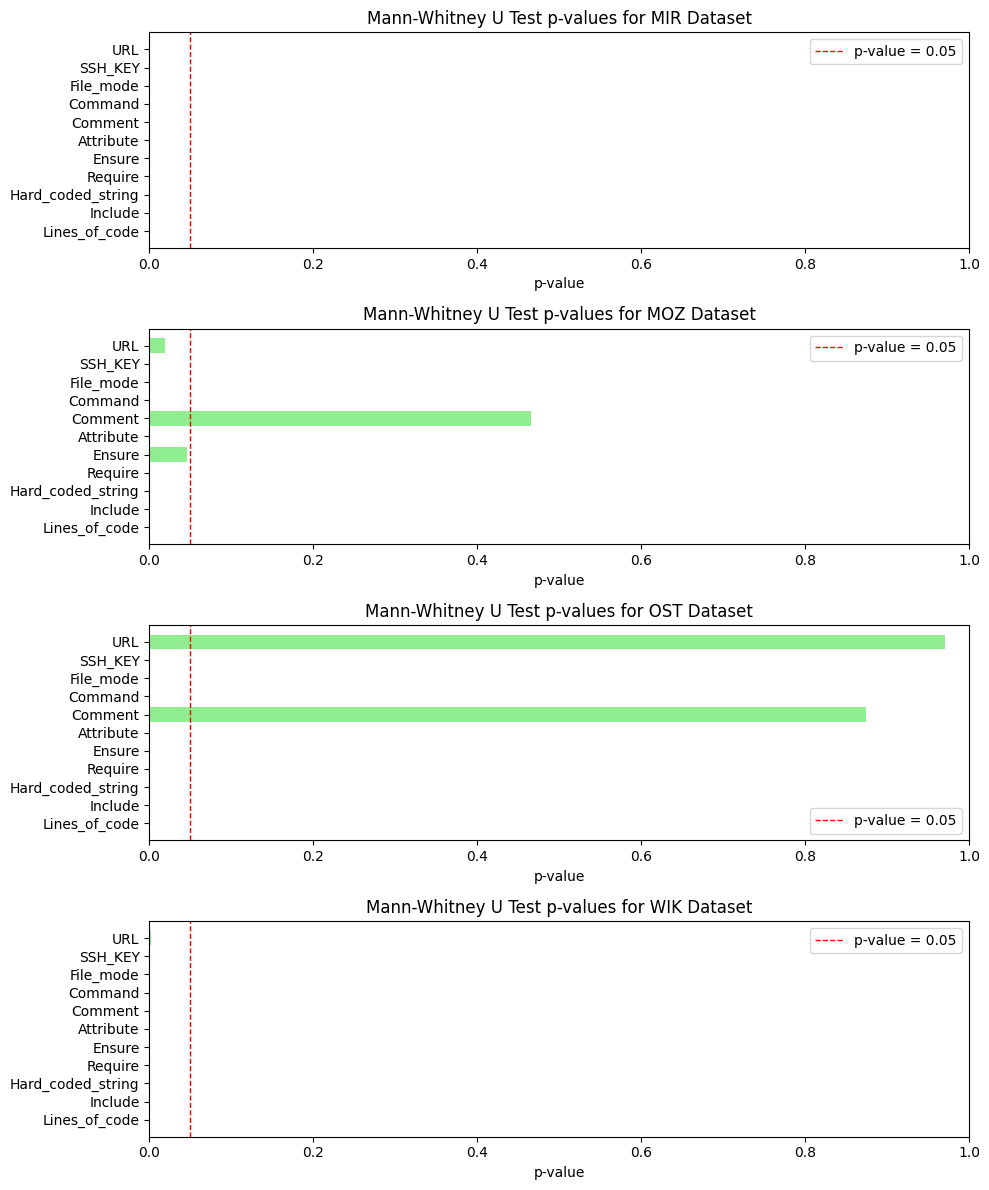

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for Mann-Whitney U test visualization
mann_whitney_p_values = {dataset: [mann_whitney_results[dataset][prop][1] for prop in properties] for dataset in dataframes}

# Initialize the figure and axes for p-values
fig, axes = plt.subplots(len(dataframes), 1, figsize=(10, 12)) # Change 'datasets' to 'dataframes'

for idx, dataset in enumerate(dataframes):  # Change 'datasets' to 'dataframes'
    # Get p-values for the dataset
    p_values = mann_whitney_p_values[dataset]

    # Plot
    axes[idx].barh(properties, p_values, color='lightgreen')
    axes[idx].axvline(0.05, color='red', linestyle='--', linewidth=1, label="p-value = 0.05")
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title(f"Mann-Whitney U Test p-values for {dataset} Dataset")
    axes[idx].set_xlabel('p-value')
    axes[idx].legend()

plt.tight_layout()
plt.show()

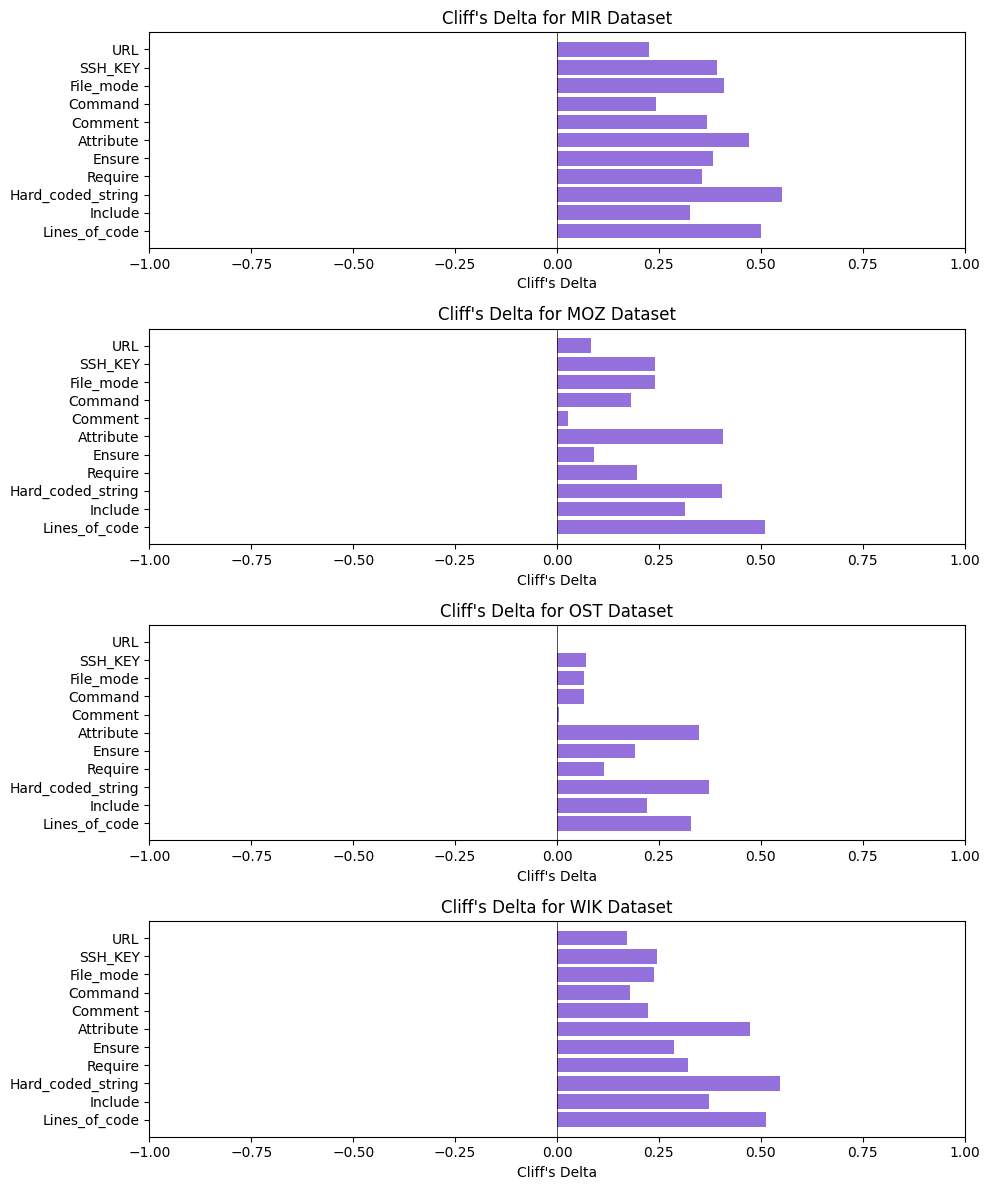

In [ ]:

# Recalculate Cliff's Delta for all properties in all datasets
all_cliffs_delta_results = {dataset: {} for dataset in dataframes}

# Calculate for each dataset and each property
for dataset_name, df in dataframes.items():
    for prop in properties:
        defective = df[df['defect_status'] == 1][prop]
        non_defective = df[df['defect_status'] == 0][prop]
        delta, magnitude = cliffs_delta_manual(defective.values, non_defective.values)
        all_cliffs_delta_results[dataset_name][prop] = (delta, magnitude)

# Prepare data for visualization
fig, axes = plt.subplots(len(dataframes), 1, figsize=(10, 12))

# Visualize Cliff's Delta for all datasets
for idx, dataset in enumerate(dataframes):
    # Get delta values for each property in the dataset
    delta_values = [all_cliffs_delta_results[dataset][prop][0] for prop in properties]

    # Plot the bar chart
    axes[idx].barh(properties, delta_values, color='mediumpurple')
    axes[idx].set_xlim(-1, 1)
    axes[idx].set_title(f"Cliff's Delta for {dataset} Dataset")
    axes[idx].axvline(0, color='black', linewidth=0.5)
    axes[idx].set_xlabel("Cliff's Delta")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

#  dataframes is the dictionary holding the MIR, MOZ, OST, WIK datasets
properties = ['Attribute', 'Command', 'Comment', 'Ensure', 'File', 'File_mode', 'Hard_coded_string',
              'Include', 'Lines_of_code', 'Require', 'SSH_KEY', 'URL']

# Prepare a dictionary to store the results
average_max_results = { 'MIR': {}, 'MOZ': {}, 'OST': {}, 'WIK': {} }

# Calculate average and maximum for each property and each dataset
for dataset_name, df in dataframes.items():
    for prop in properties:
        avg_value = round(df[prop].mean(), 2)
        max_value = round(df[prop].max(), 2)
        average_max_results[dataset_name][prop] = (avg_value, max_value)

# Convert the results into a DataFrame for better presentation
average_max_df = pd.DataFrame(average_max_results)

# Display the table
print("Average and Maximum Values (Table 6):")
average_max_df


Average and Maximum Values (Table 6):


,MIR,MOZ,OST,WIK
Attribute,"(26.21, 249)","(11.67, 229)","(15.19, 283)","(12.6, 232)"
Command,"(0.36, 6)","(0.35, 6)","(0.27, 8)","(0.42, 4)"
Comment,"(16.23, 128)","(4.11, 121)","(33.58, 623)","(13.88, 130)"
Ensure,"(2.96, 42)","(1.27, 22)","(1.14, 55)","(1.53, 28)"
File,"(1.53, 25)","(0.76, 10)","(0.4, 15)","(1.38, 27)"
File_mode,"(1.21, 17)","(0.65, 12)","(0.25, 11)","(0.7, 18)"
Hard_coded_string,"(19.84, 203)","(7.19, 364)","(10.77, 212)","(9.84, 235)"
Include,"(5.74, 70)","(4.93, 129)","(2.66, 57)","(4.14, 29)"
Lines_of_code,"(97.58, 1287)","(52.19, 1157)","(88.27, 1222)","(58.92, 464)"
Require,"(2.01, 35)","(0.71, 9)","(0.49, 20)","(1.23, 11)"


In [ ]:


# Prepare a dictionary to store the results
median_results = {
    'MIR': {'D': {}, 'ND': {}},
    'MOZ': {'D': {}, 'ND': {}},
    'OST': {'D': {}, 'ND': {}},
    'WIK': {'D': {}, 'ND': {}},
}

# Calculate median for defective and non-defective scripts in each dataset
for dataset_name, df in dataframes.items():
    defective_df = df[df['defect_status'] == 1]
    non_defective_df = df[df['defect_status'] == 0]

    for prop in properties:
        median_results[dataset_name]['D'][prop] = defective_df[prop].median()
        median_results[dataset_name]['ND'][prop] = non_defective_df[prop].median()

# Create a DataFrame to display the results in a format similar to Table 7
median_df = pd.DataFrame({
    'Property': properties,
    'MIR_D': [median_results['MIR']['D'][prop] for prop in properties],
    'MIR_ND': [median_results['MIR']['ND'][prop] for prop in properties],
    'MOZ_D': [median_results['MOZ']['D'][prop] for prop in properties],
    'MOZ_ND': [median_results['MOZ']['ND'][prop] for prop in properties],
    'OST_D': [median_results['OST']['D'][prop] for prop in properties],
    'OST_ND': [median_results['OST']['ND'][prop] for prop in properties],
    'WIK_D': [median_results['WIK']['D'][prop] for prop in properties],
    'WIK_ND': [median_results['WIK']['ND'][prop] for prop in properties],
})

# Display the table
median_df


,Property,MIR_D,MIR_ND,MOZ_D,MOZ_ND,OST_D,OST_ND,WIK_D,WIK_ND
0,Attribute,23.0,6.5,10.0,3.0,13.0,5.0,12.0,3.0
1,Command,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Comment,14.0,4.5,3.0,3.0,17.0,21.0,8.0,4.0
3,Ensure,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,File,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,File_mode,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Hard_coded_string,19.5,4.0,4.0,2.0,8.0,4.0,8.0,2.0
7,Include,5.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0
8,Lines_of_code,90.0,38.0,53.0,25.0,77.0,46.0,57.0,20.0
9,Require,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:


properties = ['Attribute', 'Command', 'Comment', 'Ensure', 'File', 'File_mode', 'Hard_coded_string',
              'Include', 'Lines_of_code', 'Require', 'SSH_KEY', 'URL']


# Extract p-values and Cliff's Delta results for each dataset and property, handling missing keys
table_8_data = {
    'Property': properties,
    'MIR_p-value': [mann_whitney_results['MIR'].get(prop, (None, None))[1] for prop in properties],
    'MIR_Cliff': [cliffs_delta_results_manual['MIR'].get(prop, (None, None))[0] for prop in properties],
    'MOZ_p-value': [mann_whitney_results['MOZ'].get(prop, (None, None))[1] for prop in properties],
    'MOZ_Cliff': [cliffs_delta_results_manual['MOZ'].get(prop, (None, None))[0] for prop in properties],
    'OST_p-value': [mann_whitney_results['OST'].get(prop, (None, None))[1] for prop in properties],
    'OST_Cliff': [cliffs_delta_results_manual['OST'].get(prop, (None, None))[0] for prop in properties],
    'WIK_p-value': [mann_whitney_results['WIK'].get(prop, (None, None))[1] for prop in properties],
    'WIK_Cliff': [cliffs_delta_results_manual['WIK'].get(prop, (None, None))[0] for prop in properties],
}

# Convert the results into a DataFrame for Table 8
table_8_df = pd.DataFrame(table_8_data)

# Display Table 8
print("Table 8: Validation of Identified Source Code Properties")
table_8_df

Table 8: Validation of Identified Source Code Properties


,Property,MIR_p-value,MIR_Cliff,MOZ_p-value,MOZ_Cliff,OST_p-value,OST_Cliff,WIK_p-value,WIK_Cliff
0,Attribute,4.952850e-08,0.470238,2.462324e-17,0.407558,1.097183e-28,0.349393,2.287817e-12,0.472648
1,Command,5.692924e-05,0.242932,2.869812e-07,0.181672,4.163030e-04,0.065335,5.974016e-04,0.178836
2,Comment,1.904207e-05,0.368552,4.650614e-01,0.027063,8.742398e-01,0.004968,9.086724e-04,0.223234
3,Ensure,4.362638e-06,0.382316,4.587637e-02,0.089970,3.009444e-12,0.192151,3.328857e-06,0.287509
4,File,NaN,0.364955,NaN,0.183680,NaN,0.085131,NaN,0.311387
5,File_mode,9.927870e-08,0.408606,8.353326e-10,0.240970,3.182057e-04,0.065833,5.537493e-06,0.238187
6,Hard_coded_string,1.732150e-10,0.551091,2.416636e-17,0.405333,1.345920e-32,0.373809,4.053848e-16,0.546124
7,Include,1.439469e-04,0.325645,5.897600e-11,0.313331,6.568466e-13,0.220777,2.149536e-08,0.373545
8,Lines_of_code,7.613316e-09,0.499752,4.425628e-26,0.509725,2.190757e-25,0.328233,2.806609e-14,0.513366
9,Require,1.088335e-05,0.355655,1.213012e-06,0.195612,1.991915e-07,0.114466,1.191718e-07,0.321417


In [ ]:

# Extract Cliff's Delta values for ranking the properties
ranked_data = {
    'Mirantis': sorted([(prop, cliffs_delta_results_manual['MIR'].get(prop, (None, None))[0]) for prop in properties if prop in cliffs_delta_results_manual['MIR']], key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True),
    'Mozilla': sorted([(prop, cliffs_delta_results_manual['MOZ'].get(prop, (None, None))[0]) for prop in properties if prop in cliffs_delta_results_manual['MOZ']], key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True),
    'Openstack': sorted([(prop, cliffs_delta_results_manual['OST'].get(prop, (None, None))[0]) for prop in properties if prop in cliffs_delta_results_manual['OST']], key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True),
    'Wikimedia': sorted([(prop, cliffs_delta_results_manual['WIK'].get(prop, (None, None))[0]) for prop in properties if prop in cliffs_delta_results_manual['WIK']], key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True)
}


# Practitioner agreement from the paper
practitioner_agreement = {
    'Include': 62, 'Hard_coded_string': 58, 'URL': 52, 'Command': 46,
    'Lines_of_code': 42, 'Require': 42, 'File': 31, 'Attribute': 27,
    'Comment': 23, 'SSH_KEY': 23, 'Ensure': 19, 'File_mode': 15 # Changed 'File mode' to 'File_mode'
}

# Create a DataFrame for Table 9
table_9_data = {
    'Rank': range(1, len(ranked_data['Mirantis']) + 1), # Dynamically adjust Rank based on Mirantis length
    'Mirantis': [f"{prop} ({round(value, 2)})" for prop, value in ranked_data['Mirantis']],
    'Mozilla': [f"{prop} ({round(value, 2)})" for prop, value in ranked_data['Mozilla']],
    'Openstack': [f"{prop} ({round(value, 2)})" for prop, value in ranked_data['Openstack']],
    'Wikimedia': [f"{prop} ({round(value, 2)})" for prop, value in ranked_data['Wikimedia']],
    'Practitioner Agreement': [f"{practitioner_agreement.get(prop, '-')}%)" for prop, _ in ranked_data['Mirantis']] # Use get to handle missing keys
}

# Convert to DataFrame
table_9_df = pd.DataFrame(table_9_data)


# Display the table in text format
print("Table 9: Ranked Order of Source Code Properties by Importance and Practitioner Agreement")
table_9_df

Table 9: Ranked Order of Source Code Properties by Importance and Practitioner Agreement


,Rank,Mirantis,Mozilla,Openstack,Wikimedia,Practitioner Agreement
0,1,Hard_coded_string (0.55),Lines_of_code (0.51),Hard_coded_string (0.37),Hard_coded_string (0.55),58%)
1,2,Lines_of_code (0.5),Attribute (0.41),Attribute (0.35),Lines_of_code (0.51),42%)
2,3,Attribute (0.47),Hard_coded_string (0.41),Lines_of_code (0.33),Attribute (0.47),27%)
3,4,File_mode (0.41),Include (0.31),Include (0.22),Include (0.37),15%)
4,5,SSH_KEY (0.39),File_mode (0.24),Ensure (0.19),Require (0.32),23%)
5,6,Ensure (0.38),SSH_KEY (0.24),Require (0.11),File (0.31),19%)
6,7,Comment (0.37),Require (0.2),File (0.09),Ensure (0.29),23%)
7,8,File (0.36),File (0.18),SSH_KEY (0.07),SSH_KEY (0.24),31%)
8,9,Require (0.36),Command (0.18),File_mode (0.07),File_mode (0.24),42%)
9,10,Include (0.33),Ensure (0.09),Command (0.07),Comment (0.22),62%)


In [ ]:

# Data for Table 10 (Survey responses from practitioners)
table_10_data = {
    'Property': ['Attribute', 'Comment', 'Command', 'Ensure', 'File', 'File mode',
                 'Hard-coded string', 'Include', 'Lines of code', 'Require', 'SSH_KEY', 'URL'],
    'Strongly disagree (%)': [11.5, 15.3, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 7.7, 3.8, 3.8, 3.8],
    'Disagree (%)': [26.9, 38.4, 3.8, 38.4, 15.3, 19.2, 11.5, 11.5, 15.3, 23.0, 15.3, 11.5],
    'Neutral (%)': [34.6, 23.0, 46.1, 38.4, 50.0, 61.5, 26.9, 23.0, 34.6, 30.7, 57.7, 30.7],
    'Agree (%)': [23.0, 15.3, 30.7, 7.7, 23.0, 11.5, 46.1, 46.1, 34.6, 34.6, 15.3, 46.1],
    'Strongly agree (%)': [3.8, 7.7, 15.3, 11.53, 7.7, 3.8, 11.5, 15.3, 7.7, 7.7, 7.7, 3.8]
}

# Convert to DataFrame
table_10_df = pd.DataFrame(table_10_data)

# Display Table 10
print("Table 10: Survey Responses from Practitioners")
table_10_df


Table 10: Survey Responses from Practitioners


,Property,Strongly disagree (%),Disagree (%),Neutral (%),Agree (%),Strongly agree (%)
0,Attribute,11.5,26.9,34.6,23.0,3.80
1,Comment,15.3,38.4,23.0,15.3,7.70
2,Command,3.8,3.8,46.1,30.7,15.30
3,Ensure,3.8,38.4,38.4,7.7,11.53
4,File,3.8,15.3,50.0,23.0,7.70
5,File mode,3.8,19.2,61.5,11.5,3.80
6,Hard-coded string,3.8,11.5,26.9,46.1,11.50
7,Include,3.8,11.5,23.0,46.1,15.30
8,Lines of code,7.7,15.3,34.6,34.6,7.70
9,Require,3.8,23.0,30.7,34.6,7.70


In [ ]:
# Data for Table 11 (Reported practitioner experience)
table_11_data = {
    'Experience (Years)': ['< 1', '1–2', '3–5', '6–10', '> 10'],
    'Count': [1, 6, 11, 7, 1],
    'Percentage': ['3.9%', '23.0%', '42.3%', '26.9%', '3.9%']
}

# Convert to DataFrame
table_11_df = pd.DataFrame(table_11_data)

# Display Table 11
print("Table 11: Reported Practitioner Experience")
table_11_df


Table 11: Reported Practitioner Experience


,Experience (Years),Count,Percentage
0,< 1,1,3.9%
1,1–2,6,23.0%
2,3–5,11,42.3%
3,6–10,7,26.9%
4,> 10,1,3.9%


In [ ]:

# Data for Table 12 (Number of principal components used for prediction models)
table_12_data = {
    'Dataset': ['Mirantis', 'Mozilla', 'Openstack', 'Wikimedia'],
    'Property-based': [1, 1, 2, 2],
    'Bag-of-words': [50, 140, 400, 150]
}

# Convert to DataFrame
table_12_df = pd.DataFrame(table_12_data)

# Display Table 12
print("Table 12: Number of Principal Components Used for Prediction Models")
table_12_df


Table 12: Number of Principal Components Used for Prediction Models


,Dataset,Property-based,Bag-of-words
0,Mirantis,1,50
1,Mozilla,1,140
2,Openstack,2,400
3,Wikimedia,2,150


In [ ]:
import numpy as np

# Function to manually calculate Cliff's Delta
def cliffs_delta_manual(x, y):
    nx = len(x)
    ny = len(y)

    # Create pairwise comparisons
    comparisons = np.array([(i, j) for i in x for j in y])

    # Count the number of favorable, unfavorable, and ties
    count_greater = np.sum(comparisons[:, 0] > comparisons[:, 1])
    count_less = np.sum(comparisons[:, 0] < comparisons[:, 1])
    ties = np.sum(comparisons[:, 0] == comparisons[:, 1])

    # Calculate delta
    delta = (count_greater - count_less) / (nx * ny)

    # Interpret effect size
    magnitude = 'negligible'
    abs_delta = np.abs(delta)
    if abs_delta >= 0.47:
        magnitude = 'large'
    elif abs_delta >= 0.33:
        magnitude = 'medium'
    elif abs_delta >= 0.14:
        magnitude = 'small'

    return delta, magnitude

# Run the manual Cliff's Delta calculation
cliffs_delta_results_manual = {dataset: {} for dataset in dataframes}

# Calculate for each dataset and property
for dataset_name, df in dataframes.items():
    for prop in properties:
        defective = df[df['defect_status'] == 1][prop]
        non_defective = df[df['defect_status'] == 0][prop]
        delta, magnitude = cliffs_delta_manual(defective.values, non_defective.values)
        cliffs_delta_results_manual[dataset_name][prop] = (delta, magnitude)

# Display the results
cliffs_delta_results_manual


{'MIR': {'Attribute': (0.47023809523809523, 'large'),
  'Command': (0.24293154761904762, 'small'),
  'Comment': (0.3685515873015873, 'medium'),
  'Ensure': (0.38231646825396826, 'medium'),
  'File': (0.36495535714285715, 'medium'),
  'File_mode': (0.4086061507936508, 'medium'),
  'Hard_coded_string': (0.5510912698412699, 'large'),
  'Include': (0.3256448412698413, 'small'),
  'Lines_of_code': (0.49975198412698413, 'large'),
  'Require': (0.3556547619047619, 'medium'),
  'SSH_KEY': (0.3922371031746032, 'medium'),
  'URL': (0.22470238095238096, 'small')},
 'MOZ': {'Attribute': (0.40755842625001504, 'medium'),
  'Command': (0.18167165830717233, 'small'),
  'Comment': (0.02706311117526071, 'negligible'),
  'Ensure': (0.08996980959597782, 'negligible'),
  'File': (0.18368034255884724, 'small'),
  'File_mode': (0.24096994190452134, 'small'),
  'Hard_coded_string': (0.40533323710893804, 'medium'),
  'Include': (0.3133306871624629, 'small'),
  'Lines_of_code': (0.509724677948977, 'large'),
  '

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing the data for PCA and model training
def prepare_data_for_pca(df, properties):
    # Extracting features and labels (defect status)
    X = df[properties].fillna(0)  # Replace NaN with 0 for simplicity
    y = df['defect_status']  # Labels: 1 for defective, 0 for non-defective

    # Standardize the data before applying PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Applying PCA on the datasets
pca_results = {}
explained_variances = {}

for dataset_name, df in dataframes.items():
    X_scaled, y = prepare_data_for_pca(df, properties)

    # Apply PCA to retain 95% of the variance
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    # Store the PCA results and explained variance
    pca_results[dataset_name] = (X_pca, y)
    explained_variances[dataset_name] = pca.explained_variance_ratio_

# Display the amount of variance explained by PCA for each dataset
explained_variances


{'MIR': array([0.67278149, 0.07981186, 0.07237666, 0.06261946, 0.04856525,
        0.02628902]),
 'MOZ': array([0.35551027, 0.21120939, 0.09448401, 0.08233178, 0.07269719,
        0.06445244, 0.05037655, 0.03750613]),
 'OST': array([0.42763078, 0.15451434, 0.10512365, 0.07810079, 0.07106358,
        0.06411873, 0.04590276, 0.02895615]),
 'WIK': array([0.50074461, 0.13686602, 0.10176721, 0.0719965 , 0.06743623,
        0.05202575, 0.03210663])}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Function to train and evaluate models, returning performance metrics
def train_and_evaluate(X, y, model):
    # Split the data into train and test sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    return precision, recall, f1, auc

# Define models to train
models = {
    'CART': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

# Prepare to store results
model_results = {dataset: {} for dataset in pca_results}

# Train and evaluate each model on each dataset
for dataset_name, (X_pca, y) in pca_results.items():
    for model_name, model in models.items():
        precision, recall, f1, auc = train_and_evaluate(X_pca, y, model)
        model_results[dataset_name][model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Measure': f1,
            'AUC': auc
        }

# Convert results into a DataFrame for better visualization
model_results_df = pd.DataFrame.from_dict({(i,j): model_results[i][j]
                                           for i in model_results.keys()
                                           for j in model_results[i].keys()},
                                           orient='index')



# Display the DataFrame
model_results_df


Precision    Recall  F1-Measure       AUC
MIR CART                  0.619048  0.764706    0.684211  0.688854
    KNN                   0.578947  0.647059    0.611111  0.665635
    Logistic Regression   0.687500  0.647059    0.666667  0.783282
    Naive Bayes           0.636364  0.411765    0.500000  0.741486
    Random Forest         0.565217  0.764706    0.650000  0.721362
MOZ CART                  0.681818  0.612245    0.645161  0.705909
    KNN                   0.604651  0.530612    0.565217  0.706975
    Logistic Regression   0.764706  0.530612    0.626506  0.750533
    Naive Bayes           0.739130  0.346939    0.472222  0.691441
    Random Forest         0.660000  0.673469    0.666667  0.802315
OST CART                  0.751381  0.759777    0.755556  0.649270
    KNN                   0.794286  0.776536    0.785311  0.765876
    Logistic Regression   0.800000  0.692737    0.742515  0.732927
    Naive Bayes           0.920455  0.452514    0.606742  0.757211
    Random Forest         0.780105  0.832402    0.805405  0.782180
WIK CART                  0.612903  0.612903    0.612903  0.602892
    KNN                   0.655172  0.612903    0.633333  0.649055
    Logistic Regression   0.692308  0.580645    0.631579  0.750834
    Naive Bayes           0.705882  0.387097    0.500000  0.774194
    Random Forest         0.636364  0.677419    0.656250  0.679088

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

def preprocess_text(df, text_columns):
    # Combine relevant columns to create a corpus for Bag of Words
    df['text'] = df[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
    return df

# Step 2: Convert scripts to Bag-of-Words
def bag_of_words_vectorization(df, text_column):
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transform(df[text_column])
    return X_bow.toarray(), vectorizer  # Convert sparse matrix to dense

# Step 3: Train and evaluate models with Bag-of-Words representation
def train_and_evaluate_bow(df, target_column, text_column, models):
    # Bag-of-words vectorization
    X_bow, vectorizer = bag_of_words_vectorization(df, text_column)
    y = df[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

    # Store the results
    results = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

        # Store the results
        results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Measure': f1,
            'AUC': auc
        }

    return pd.DataFrame(results).T

# Step 4: Apply it to your data
text_columns = ['Hard_coded_string', 'Attribute', 'Command', 'Lines_of_code']  # Add relevant columns
target_column = 'defect_status'  # The target for defect prediction

# Preprocess the text in each dataset
for dataset_name, df in dataframes.items():
    df = preprocess_text(df, text_columns)
    print(f"Processing dataset: {dataset_name}")

    # Define models
    models = {
        'CART': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier()
    }

    # Train and evaluate models on Bag-of-Words
    bow_results = train_and_evaluate_bow(df, target_column, 'text', models)
    print(f"Bag-of-Words Results for {dataset_name} dataset:")
    print(bow_results)


Processing dataset: MIR
Bag-of-Words Results for MIR dataset:
                     Precision    Recall  F1-Measure       AUC
CART                  0.400000  0.470588    0.432432  0.462848
KNN                   0.750000  0.176471    0.285714  0.442724
Logistic Regression   0.571429  0.705882    0.631579  0.662539
Naive Bayes           0.625000  0.588235    0.606061  0.705882
Random Forest         0.437500  0.411765    0.424242  0.520124
Processing dataset: MOZ
Bag-of-Words Results for MOZ dataset:
                     Precision    Recall  F1-Measure       AUC
CART                  0.615385  0.326531    0.426667  0.614529
KNN                   0.350000  0.142857    0.202899  0.547670
Logistic Regression   0.548387  0.346939    0.425000  0.594883
Naive Bayes           0.545455  0.122449    0.200000  0.612245
Random Forest         0.586207  0.346939    0.435897  0.623515
Processing dataset: OST
Bag-of-Words Results for OST dataset:
                     Precision    Recall  F1-Measure      

In [ ]:
# Prepare the data for the F1-Measure table
f1_table = {
    'Dataset': ['MIR', 'MOZ', 'OST', 'WIK'],
    'CART': [model_results['MIR']['CART']['F1-Measure'], model_results['MOZ']['CART']['F1-Measure'],
             model_results['OST']['CART']['F1-Measure'], model_results['WIK']['CART']['F1-Measure']],
    'KNN': [model_results['MIR']['KNN']['F1-Measure'], model_results['MOZ']['KNN']['F1-Measure'],
            model_results['OST']['KNN']['F1-Measure'], model_results['WIK']['KNN']['F1-Measure']],
    'LR': [model_results['MIR']['Logistic Regression']['F1-Measure'], model_results['MOZ']['Logistic Regression']['F1-Measure'],
           model_results['OST']['Logistic Regression']['F1-Measure'], model_results['WIK']['Logistic Regression']['F1-Measure']],
    'NB': [model_results['MIR']['Naive Bayes']['F1-Measure'], model_results['MOZ']['Naive Bayes']['F1-Measure'],
           model_results['OST']['Naive Bayes']['F1-Measure'], model_results['WIK']['Naive Bayes']['F1-Measure']],
    'RF': [model_results['MIR']['Random Forest']['F1-Measure'], model_results['MOZ']['Random Forest']['F1-Measure'],
           model_results['OST']['Random Forest']['F1-Measure'], model_results['WIK']['Random Forest']['F1-Measure']]
}


f1_df = pd.DataFrame(f1_table)

# Display the table
print("F1-Measure Table:")
f1_df


F1-Measure Table:


,Dataset,CART,KNN,LR,NB,RF
0,MIR,0.631579,0.611111,0.666667,0.500000,0.578947
1,MOZ,0.645833,0.565217,0.626506,0.472222,0.666667
2,OST,0.744444,0.785311,0.742515,0.606742,0.812155
3,WIK,0.557377,0.633333,0.631579,0.500000,0.625000


In [ ]:
# Prepare the data for the AUC table
auc_table = {
    'Dataset': ['MIR', 'MOZ', 'OST', 'WIK'],
    'CART': [model_results['MIR']['CART']['AUC'], model_results['MOZ']['CART']['AUC'],
             model_results['OST']['CART']['AUC'], model_results['WIK']['CART']['AUC']],
    'KNN': [model_results['MIR']['KNN']['AUC'], model_results['MOZ']['KNN']['AUC'],
            model_results['OST']['KNN']['AUC'], model_results['WIK']['KNN']['AUC']],
    'LR': [model_results['MIR']['Logistic Regression']['AUC'], model_results['MOZ']['Logistic Regression']['AUC'],
           model_results['OST']['Logistic Regression']['AUC'], model_results['WIK']['Logistic Regression']['AUC']],
    'NB': [model_results['MIR']['Naive Bayes']['AUC'], model_results['MOZ']['Naive Bayes']['AUC'],
           model_results['OST']['Naive Bayes']['AUC'], model_results['WIK']['Naive Bayes']['AUC']],
    'RF': [model_results['MIR']['Random Forest']['AUC'], model_results['MOZ']['Random Forest']['AUC'],
           model_results['OST']['Random Forest']['AUC'], model_results['WIK']['Random Forest']['AUC']]
}

auc_df = pd.DataFrame(auc_table)

# Display AUC table
print("AUC Table:")
auc_df


AUC Table:


,Dataset,CART,KNN,LR,NB,RF
0,MIR,0.631579,0.665635,0.783282,0.741486,0.688854
1,MOZ,0.696162,0.706975,0.750533,0.691441,0.798812
2,OST,0.632967,0.765876,0.732927,0.757211,0.784888
3,WIK,0.551724,0.649055,0.750834,0.774194,0.643493


In [ ]:
# Prepare the data for the Precision table
precision_table = {
    'Dataset': ['MIR', 'MOZ', 'OST', 'WIK'],
    'CART': [model_results['MIR']['CART']['Precision'], model_results['MOZ']['CART']['Precision'],
             model_results['OST']['CART']['Precision'], model_results['WIK']['CART']['Precision']],
    'KNN': [model_results['MIR']['KNN']['Precision'], model_results['MOZ']['KNN']['Precision'],
            model_results['OST']['KNN']['Precision'], model_results['WIK']['KNN']['Precision']],
    'LR': [model_results['MIR']['Logistic Regression']['Precision'], model_results['MOZ']['Logistic Regression']['Precision'],
           model_results['OST']['Logistic Regression']['Precision'], model_results['WIK']['Logistic Regression']['Precision']],
    'NB': [model_results['MIR']['Naive Bayes']['Precision'], model_results['MOZ']['Naive Bayes']['Precision'],
           model_results['OST']['Naive Bayes']['Precision'], model_results['WIK']['Naive Bayes']['Precision']],
    'RF': [model_results['MIR']['Random Forest']['Precision'], model_results['MOZ']['Random Forest']['Precision'],
           model_results['OST']['Random Forest']['Precision'], model_results['WIK']['Random Forest']['Precision']]
}

precision_df = pd.DataFrame(precision_table)

# Display Precision table
print("Precision Table:")
precision_df


Precision Table:


,Dataset,CART,KNN,LR,NB,RF
0,MIR,0.571429,0.578947,0.687500,0.636364,0.523810
1,MOZ,0.659574,0.604651,0.764706,0.739130,0.680851
2,OST,0.740331,0.794286,0.800000,0.920455,0.803279
3,WIK,0.566667,0.655172,0.692308,0.705882,0.606061


In [ ]:
# Prepare the data for the Recall table
recall_table = {
    'Dataset': ['MIR', 'MOZ', 'OST', 'WIK'],
    'CART': [model_results['MIR']['CART']['Recall'], model_results['MOZ']['CART']['Recall'],
             model_results['OST']['CART']['Recall'], model_results['WIK']['CART']['Recall']],
    'KNN': [model_results['MIR']['KNN']['Recall'], model_results['MOZ']['KNN']['Recall'],
            model_results['OST']['KNN']['Recall'], model_results['WIK']['KNN']['Recall']],
    'LR': [model_results['MIR']['Logistic Regression']['Recall'], model_results['MOZ']['Logistic Regression']['Recall'],
           model_results['OST']['Logistic Regression']['Recall'], model_results['WIK']['Logistic Regression']['Recall']],
    'NB': [model_results['MIR']['Naive Bayes']['Recall'], model_results['MOZ']['Naive Bayes']['Recall'],
           model_results['OST']['Naive Bayes']['Recall'], model_results['WIK']['Naive Bayes']['Recall']],
    'RF': [model_results['MIR']['Random Forest']['Recall'], model_results['MOZ']['Random Forest']['Recall'],
           model_results['OST']['Random Forest']['Recall'], model_results['WIK']['Random Forest']['Recall']]
}

recall_df = pd.DataFrame(recall_table)

# Display Recall table
print("Recall Table:")
recall_df


Recall Table:


,Dataset,CART,KNN,LR,NB,RF
0,MIR,0.705882,0.647059,0.647059,0.411765,0.647059
1,MOZ,0.632653,0.530612,0.530612,0.346939,0.653061
2,OST,0.748603,0.776536,0.692737,0.452514,0.821229
3,WIK,0.548387,0.612903,0.580645,0.387097,0.645161
